# Pokemon Image Color Analysis

## Team Members

- Joseph Lunine: jel99@drexel.edu
- Owen Marett: om337@drexel.edu
- Evan Radcliffe: emr76@drexel.edu
- Jiangyan Shi: js4986@drexel.edu



## Part 1 - Basic Analysis of Data from PokeAPI
### Section 1.1 - Pre-process Data from PokeAPI
Collect type and color data for each pokemon from PokeAPI data to generate DataFrame object and save into csv file. At the end, display the shape of DataFrame object and first 5 records.

In [1]:
import json, os
import pandas as pd


globalFolderData = "./data/"


'''
createFolder() create a folder by full path if not existing.
 - foldername: full path to create a folder.
'''
def createFolder(foldername):
    if not os.path.exists(foldername):
        os.mkdir(foldername)
    return


pokemonJson = json.load(open('../pokeAPI/data/detailed_pokemon_species.json'))
pokemonList = []
for key, pokemon in pokemonJson.items():
    pokemonList.append([key, pokemon['name'], pokemon['color'], pokemon['shape'], pokemon['types'][0], pokemon['types'][1] if len (pokemon['types']) > 1 else ''])

columns = ['id', 'name', 'color', 'shape', 'type1', 'type2']
pokemonDf = pd.DataFrame(pokemonList, columns = columns)
createFolder(globalFolderData)
pokemonDf.to_csv(globalFolderData + 'pokemons.csv', index = False)
print(pokemonDf.shape)
print(pokemonDf[:5])

(898, 6)
    id        name  color      shape  type1   type2
0  001   bulbasaur  green  quadruped  grass  poison
1  002     ivysaur  green  quadruped  grass  poison
2  003    venusaur  green  quadruped  grass  poison
3  004  charmander    red    upright   fire        
4  005  charmeleon    red    upright   fire        


### Section 1.2 - Display Bar Chart by Color
Count pokemons by color, then display both counter details and bar chart by color.

OrderedDict([('black', 44), ('blue', 157), ('brown', 131), ('gray', 85), ('green', 108), ('pink', 52), ('purple', 85), ('red', 86), ('white', 75), ('yellow', 75)])


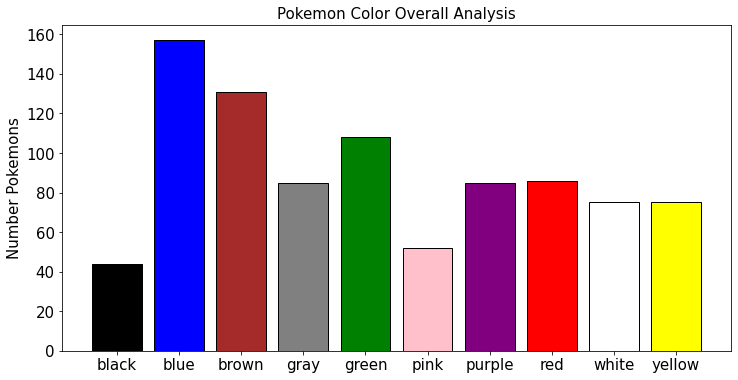

In [2]:
from collections import Counter
from collections import OrderedDict
from matplotlib import pyplot as plt

countsColor = OrderedDict(sorted(Counter(pokemonDf['color']).items()))
print(countsColor)
colors = [label for label in countsColor.keys()]

bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = range(1, len(countsColor) + 1), height = list(countsColor.values()), tick_label = colors, color = colors, edgecolor = 'black')

plt.tick_params(labelsize = 15)
plt.title("Pokemon Color Overall Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)

plt.show()

### Section 1.3 - Display Bar Chart by Type
Count pokemons by type for both types if a pokemon has dual types, then display both counter details and bar chart by type.

OrderedDict([('bug', 75), ('dark', 36), ('dragon', 31), ('electric', 49), ('fairy', 21), ('fighting', 36), ('fire', 58), ('flying', 7), ('ghost', 31), ('grass', 86), ('ground', 35), ('ice', 28), ('normal', 109), ('poison', 35), ('psychic', 58), ('rock', 50), ('steel', 30), ('water', 123)])


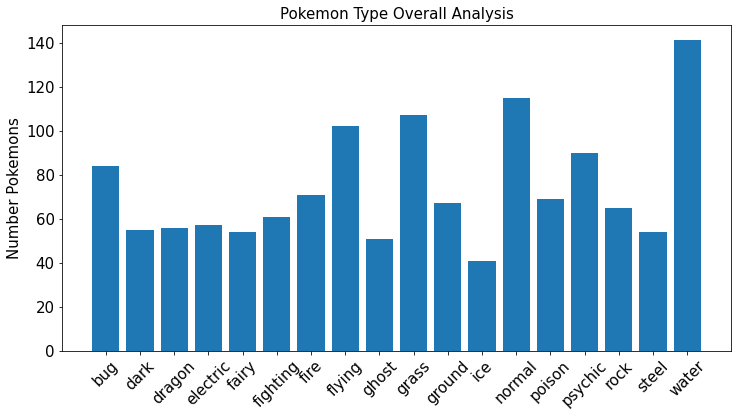

In [3]:
countsType = OrderedDict(sorted(Counter(pokemonDf['type1']).items()))
print(countsType)
for type in pokemonDf['type2']:
    if type != '':
        countsType[type] += 1
types = [label for label in countsType.keys()]

bar_fig = plt.figure(figsize = (12, 6))  
plt.bar(x = range(1, len(countsType) + 1), height = list(countsType.values()), tick_label = types)

plt.tick_params(labelsize = 15)
plt.title("Pokemon Type Overall Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()

### Section 1.4 - Display Bar Chart by Color and Type
Count pokemons by type and color, then display both counter details and bar chart by type and color.

          black  blue  brown  gray  green  pink  purple  red  white  yellow
bug           2    10      5    15     17     0      10   31     11      30
dark         16    10      6     6      2     4       6    8      1       2
dragon        2    15      2     7     13     0       3    3      3       1
electric      3     9      0     8      3     1       5    4      5      28
fairy         0     2      0     0      1     7       1    0     12       0
fighting      0     7      8    10      2     0       3    4      7       3
fire          0     0     18     1      0     0       0   50      4      10
flying        0     4      0     0      1     0       6    0      0       0
ghost        13     0     12     1      2     0      15    0      3       3
grass         0     8     14     4     70     7       8    4     10       4
ground        2     1     19    12     10     0       4    3      0       2
ice           0    14      6     2      0     2       2    4     12       0
normal      

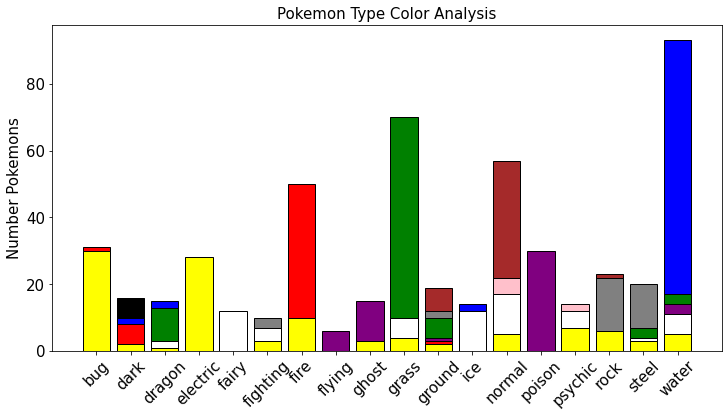

In [4]:
datas = [[0] * len(colors)] * len(types)
counters = pd.DataFrame(datas, index = types, columns = colors)
for i, pokemon in pokemonDf.iterrows():
    counters[pokemon['color']][pokemon['type1']] += 1
    if pokemon['type2'] != '':
        counters[pokemon['color']][pokemon['type1']] += 1
print(counters)

bar_fig = plt.figure(figsize = (12, 6))  
for color in colors:
    plt.bar(counters.index, counters[color], color = color, edgecolor = 'black')

plt.tick_params(labelsize = 15)
plt.title("Pokemon Type Color Analysis", fontsize = 15)
plt.ylabel("Number Pokemons", fontsize = 15)
plt.xticks(rotation = 45)

plt.show()